<a href="https://colab.research.google.com/github/kkettip/datasci_5_statistics/blob/main/datasci_5_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

import statsmodels.api as sm
import matplotlib.pyplot as plt



##Chi-Square Test

In [43]:
df = pd.read_csv('/content/Multiple_Chronic_Conditions_2018_data.csv') # noqa

In [44]:
df.sample(15)

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_MCC,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
29368,County,Tennessee : Dickson,47043.0,<65,All,All,0 to 1,0.2988,3453.5404,3288.5552,NaN,482.1429
5225,State,New Mexico,35.0,65+,Race,Hispanic,2 to 3,0.2814,4985.3334,5057.6547,0.0677,438.8068
17936,County,Utah : Iron,49021.0,All,All,All,0 to 1,0.4132,2102.3283,2103.1603,NaN,197.8769
33297,County,Colorado : Grand,8049.0,65+,All,All,2 to 3,0.2351,9758.6226,11267.5464,NaN,484.5606
20931,County,Florida : Putnam,12107.0,<65,All,All,6+,0.1874,41450.7710,42357.6191,0.3160,3225.4335
21938,County,Illinois : Ford,17053.0,<65,All,All,4 to 5,0.1546,19277.1627,21413.7872,NaN,1688.8889
12382,County,Mississippi : Franklin,28037.0,All,All,All,4 to 5,0.2396,14074.3373,13220.7292,NaN,957.1788
26495,County,Nebraska : Wheeler,31183.0,<65,All,All,6+,NaN,NaN,NaN,NaN,NaN
19347,County,Wyoming : Natrona,56025.0,All,All,All,6+,0.1066,34378.5935,37800.2958,0.2271,2607.0890
17065,County,Texas : Concho,48095.0,All,All,All,2 to 3,0.2736,6538.7639,6362.7681,NaN,580.8824


In [45]:
df.shape

(44976, 12)

Bene_Age_Lvl: Beneficiary Age
Level

Bene_MCC: Beneficiary
Multiple Chronic
Condition Group

In [46]:
df['Bene_Age_Lvl'].value_counts()


65+    14992
<65    14992
All    14992
Name: Bene_Age_Lvl, dtype: int64

In [47]:
df['Bene_MCC'].value_counts()

0 to 1    11244
2 to 3    11244
4 to 5    11244
6+        11244
Name: Bene_MCC, dtype: int64

In [48]:
contingency_table = pd.crosstab(df['Bene_Age_Lvl'], df['Bene_MCC'])
print(contingency_table)

Bene_MCC      0 to 1  2 to 3  4 to 5    6+
Bene_Age_Lvl                              
65+             3748    3748    3748  3748
<65             3748    3748    3748  3748
All             3748    3748    3748  3748


In [49]:
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 0.0
P-value: 1.0


**Null Hypothesis:** There is no correlation between the Age and Multiple Chronic Condition Group.

**Alternative Hypothesis:** There is correlation between the Age and Multiple Chronic Condition Group.


The data, age and chronic conditions, were chosen because it would be interesting to see if multiple chronic conditions affect older people more than younger people.


The p-value is 1 which is greater than 0.05 while the chi2 value is 0. This means that we can accept the null hypothesis. From the contingency table we can see that the values for chronic conditions groups are the same for both over 65 and under 65 for all multiple chronic conditions groups. This means that there is no correlation.


##T-Test

In [50]:
df['Bene_Demo_Desc'].value_counts()

All                       39036
Medicare Only               660
Medicare and Medicaid       660
Female                      660
Male                        660
Asian Pacific Islander      660
Hispanic                    660
Native American             660
non-Hispanic Black          660
non-Hispanic White          660
Name: Bene_Demo_Desc, dtype: int64

In [52]:
df2 = pd.read_csv('/content/Specific_Chronic_Conditions_2018_data.csv')

In [53]:
df2.sample(15)

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
97904,County,Wisconsin : Grant,55043.0,All,All,All,Arthritis,0.2511,13143.297519,14037.419828,NaN,NaN
7821,State,Nebraska,31.0,<65,Sex,Female,Heart Failure,0.0857,NaN,NaN,NaN,NaN
187307,County,Kansas : Bourbon,20011.0,65+,All,All,Chronic Kidney Disease,0.2241,20671.768733,19989.268856,NaN,NaN
209124,County,North Carolina : Bladen,37017.0,65+,All,All,COPD,0.1410,24808.112877,25487.517690,NaN,NaN
154323,County,Tennessee : White,47185.0,<65,All,All,Hyperlipidemia,0.4053,12327.552165,11644.965752,NaN,NaN
228224,County,Utah : Duchesne,49013.0,65+,All,All,Ischemic Heart Disease,0.2202,16230.940392,18866.342625,NaN,NaN
136553,County,Nebraska : Knox,31107.0,<65,All,All,Drug/Substance Abuse,0.0923,21151.746667,22935.072500,NaN,NaN
214385,County,Oklahoma : Choctaw,40023.0,65+,All,All,Ischemic Heart Disease,0.4243,22930.042871,22094.326579,NaN,NaN
148642,County,Pennsylvania : Clinton,42035.0,<65,All,All,Atrial Fibrillation,0.0253,41932.012273,43644.525473,NaN,NaN
67102,County,Montana : Meagher,30059.0,All,All,All,Cancer,0.0704,25759.738286,26016.939566,NaN,NaN


In [54]:
df2.shape

(236124, 12)

In [55]:
df2 = df2[['Bene_Age_Lvl', 'Prvlnc', 'Bene_Cond']]
df2 = df2[((df2['Bene_Age_Lvl'] == '65+' ) | (df2['Bene_Age_Lvl'] == '<65'))]
df2

,Bene_Age_Lvl,Prvlnc,Bene_Cond
1,65+,0.0118,Alcohol Abuse
2,<65,0.0320,Alcohol Abuse
4,65+,0.0238,Alcohol Abuse
5,<65,0.0465,Alcohol Abuse
7,65+,0.0058,Alcohol Abuse
...,...,...,...
236119,65+,NaN,Hypertension
236120,65+,NaN,Ischemic Heart Disease
236121,65+,NaN,Osteoporosis
236122,65+,NaN,Schizophrenia and Other Psychotic Disorders


In [56]:
df2 = df2.dropna()
len(df2)

120572

In [57]:
df2.sample(15)

,Bene_Age_Lvl,Prvlnc,Bene_Cond
223238,65+,0.2392,Chronic Kidney Disease
201964,65+,0.0873,Cancer
137790,<65,0.2727,Depression
115186,<65,0.0441,Alzheimer's Disease/Dementia
135202,<65,0.0000,Atrial Fibrillation
152373,<65,0.0212,Osteoporosis
7716,65+,0.0001,Autism Spectrum Disorders
31236,65+,0.3444,Diabetes
102395,<65,0.0299,Stroke
142270,<65,0.5876,Hypertension


In [58]:
df2.shape

(120572, 3)

In [59]:
Arthritis_data = df2[df2['Bene_Cond'] == 'Arthritis']

In [60]:
Arthritis_data.sample(10)

,Bene_Age_Lvl,Prvlnc,Bene_Cond
121739,<65,0.3376,Arthritis
206096,65+,0.2858,Arthritis
147527,<65,0.1979,Arthritis
27973,<65,0.2129,Arthritis
130475,<65,0.3254,Arthritis
198746,65+,0.4535,Arthritis
184760,65+,0.3856,Arthritis
99731,<65,0.3221,Arthritis
142466,<65,0.3139,Arthritis
214475,65+,0.3923,Arthritis


In [61]:
over_65 = Arthritis_data[Arthritis_data['Bene_Age_Lvl'] == '65+']['Prvlnc']
over_65_mean = over_65.mean()
over_65_mean

0.3401119694397283

In [62]:
under_65 = Arthritis_data[Arthritis_data['Bene_Age_Lvl'] == '<65']['Prvlnc'] # noqa
under_65_mean = under_65.mean()
under_65_mean

0.2760569043576684

In [63]:
t_stat, p_val = ttest_ind(over_65, under_65, equal_var=False)  # Assuming unequal variances with Welch's t-test # noqa

In [64]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 45.564679005866026
P-value: 0.0


**Null hypothesis:** There is no significant difference between the prevalence of arthritis in individuals over 65 and individuals under 65

**Alternate hypothesis:** There is significant difference between the prevalence of arthritis in individuals over 65 and individuals under 65

The data, age and arthritis, were chosen because it would be interesting to see if arthritis affects older people more than younger people.


The null hypothesis is rejected because the p-value is less than 0.05.


#Anova

In [65]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [66]:
df3 = pd.read_csv('/content/Specific_Chronic_Conditions_2018_data.csv') # noqa

df3.columns

Index(['Bene_Geo_Lvl', 'Bene_Geo_Desc', 'Bene_Geo_Cd', 'Bene_Age_Lvl',
       'Bene_Demo_Lvl', 'Bene_Demo_Desc', 'Bene_Cond', 'Prvlnc',
       'Tot_Mdcr_Stdzd_Pymt_PC', 'Tot_Mdcr_Pymt_PC', 'Hosp_Readmsn_Rate',
       'ER_Visits_Per_1000_Benes'],
      dtype='object')

In [67]:
df3 = df3[['Prvlnc', 'Bene_Geo_Desc', 'Bene_Cond']]
df3 = df3[((df3['Bene_Geo_Desc'] == 'California' ) | (df3['Bene_Geo_Desc'] == 'Virginia') | (df3['Bene_Geo_Desc'] == 'Chicago'))]

In [68]:
df3 = df3.dropna()

In [69]:
df3

,Prvlnc,Bene_Geo_Desc,Bene_Cond
1092,0.0215,California,Alcohol Abuse
1093,0.0145,California,Alcohol Abuse
1094,0.0347,California,Alcohol Abuse
1095,0.0158,California,Alcohol Abuse
1096,0.0237,California,Alcohol Abuse
...,...,...,...
231961,0.6127,Virginia,Hypertension
231962,0.2523,Virginia,Ischemic Heart Disease
231963,0.0657,Virginia,Osteoporosis
231964,0.0139,Virginia,Schizophrenia and Other Psychotic Disorders


In [70]:
model = ols('Prvlnc ~ C(Bene_Geo_Desc) * C(Bene_Cond)', data=df3).fit()
model

In [71]:
# Performing the two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                  sum_sq      df           F    PR(>F)
C(Bene_Geo_Desc)                0.003539     1.0    1.522078  0.217549
C(Bene_Cond)                   24.957835    20.0  536.667516  0.000000
C(Bene_Geo_Desc):C(Bene_Cond)   0.089828    20.0    1.931560  0.008129
Residual                        2.764735  1189.0         NaN       NaN


Null Hypothesis: The prevalence of conditions do not differ across different states, such as California, Chicago and Virginia.

Alternative Hypothesis: The prevalence of conditions do differ across different states, such as California, Chicago and Virginia.


The data, prevalence, conditions and states, were chosen because it would be interesting to see if the prevalence of conditions differ across different states.


The p-value is higher than 0.05, which means that there is no significant difference in prevalence of conditions between the states. Therefore, the null hypothesis is accepted.



##Regression

In [72]:
df4 = pd.read_csv('/content/Specific_Chronic_Conditions_2018_data.csv') # noqa

df4.columns

Index(['Bene_Geo_Lvl', 'Bene_Geo_Desc', 'Bene_Geo_Cd', 'Bene_Age_Lvl',
       'Bene_Demo_Lvl', 'Bene_Demo_Desc', 'Bene_Cond', 'Prvlnc',
       'Tot_Mdcr_Stdzd_Pymt_PC', 'Tot_Mdcr_Pymt_PC', 'Hosp_Readmsn_Rate',
       'ER_Visits_Per_1000_Benes'],
      dtype='object')

Tot_Mdcr_Stdzd_Pymt_PC: Medicare Standardized Payment

In [73]:
df4 = df4[['Prvlnc', 'Tot_Mdcr_Stdzd_Pymt_PC']]

In [74]:
df4 = df4.dropna()

In [75]:
# Define the dependent and independent variables
X = df4[['Prvlnc']]
y = df4['Tot_Mdcr_Stdzd_Pymt_PC']


# Add a constant to the independent variable (required for the statsmodels regression model)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())



                              OLS Regression Results                              
Dep. Variable:     Tot_Mdcr_Stdzd_Pymt_PC   R-squared:                       0.083
Model:                                OLS   Adj. R-squared:                  0.083
Method:                     Least Squares   F-statistic:                 1.491e+04
Date:                    Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                            05:10:05   Log-Likelihood:            -1.7130e+06
No. Observations:                  164351   AIC:                         3.426e+06
Df Residuals:                      164349   BIC:                         3.426e+06
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

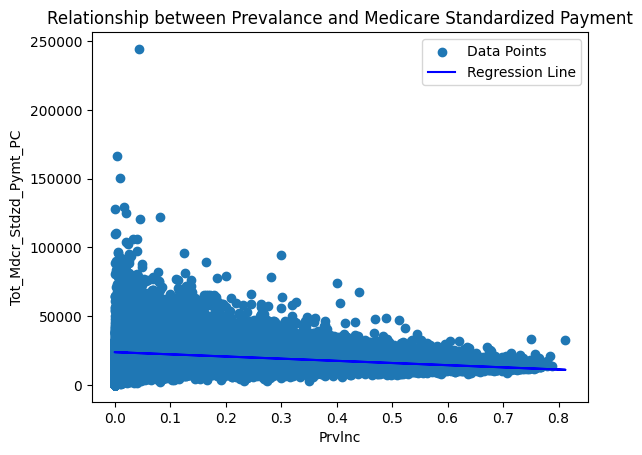

In [79]:
plt.scatter(df4['Prvlnc'], df4['Tot_Mdcr_Stdzd_Pymt_PC'], label='Data Points')
plt.plot(df4['Prvlnc'], model.predict(X), color='blue', label='Regression Line')
plt.xlabel('Prvlnc')
plt.ylabel('Tot_Mdcr_Stdzd_Pymt_PC')
plt.title('Relationship between Prevalance and Medicare Standardized Payment')
plt.legend()
plt.show()

**Null hypothesis:** There is no significant relationship between the condition prevalence and Medicare standardized payment.

**Alternate hypothesis:** There is a significant relationship between the condition prevalence and Medicare standardized payment.

It would be interesting to see if Medicare standardized payment was higher with higher condition prevalence.


An R squared value of 0.08 shows that there is a weak relationship between Medicare standardized payment and condition prevalence.  


